# **1) Текстовое описание набора данных**

Датасет содержит информацию о заработной плате в data science, в период с 2020 по 2024 год. Данные включают в себя различные аспекты, связанные с заработной платой, обеспечивая многогранное представление о заработной плате.

Датасет состоит из одного файла - data_science_salaries.csv
Файл содержит следующие колонки:
*   job_title - название должности
*   experience_level - уровень работника (Mid-level, Senior-level, и так далее)
*   employment_type - уровень занятости (например, Full-time)
*   work_models - место, откуда ведется работа (Remote, On-Site)
*   work_year - год, в который велась работа
*   employee_residense
*   salary - зарплата в валюте
*   salary_currency - валюта, в которой выдавалась зарплата
*   salary_in_usd - зарплата в долларах США
*   company_location - местоположение работодателя
*   company_size - количесто работников в компании












In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('sample_data/data_science_salaries.csv', sep=",")

# **2) Основные характеристики датасета**

In [3]:
# Первые 5 строк датасета
data.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
# пустых значений нет, всего 11 колонок, 6599 строк
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [5]:
# основные статистические характеристки датасета
data.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


# **3) Визуальное исследование датасета**

<Axes: xlabel='salary', ylabel='salary_in_usd'>

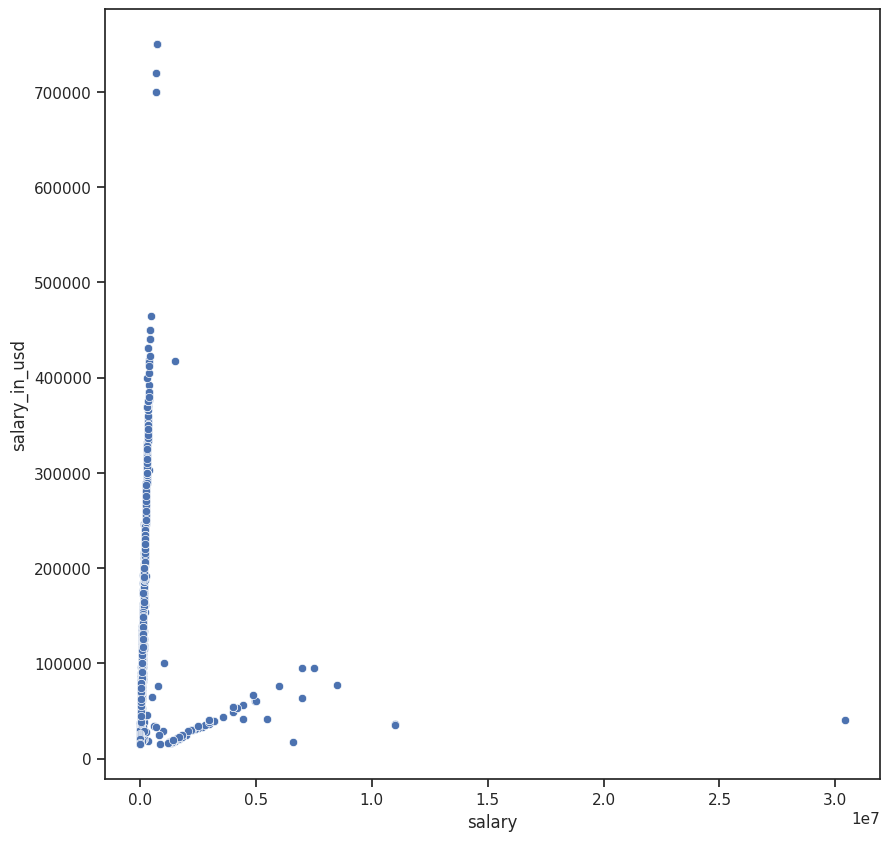

In [6]:
# диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='salary', y='salary_in_usd', data=data)

Из диаграммы рассеяния видно, что между зарплатой в валюте и зарплатой в долларах США линейная зависимость. При этом, для некоторых строк датасета этот коэффициент отличается от большинства, то есть зависит от какого-то параметра.

Посмотрим, как влияет валюта начисления зарплаты на этот коэффициент:

<Axes: xlabel='salary', ylabel='salary_in_usd'>

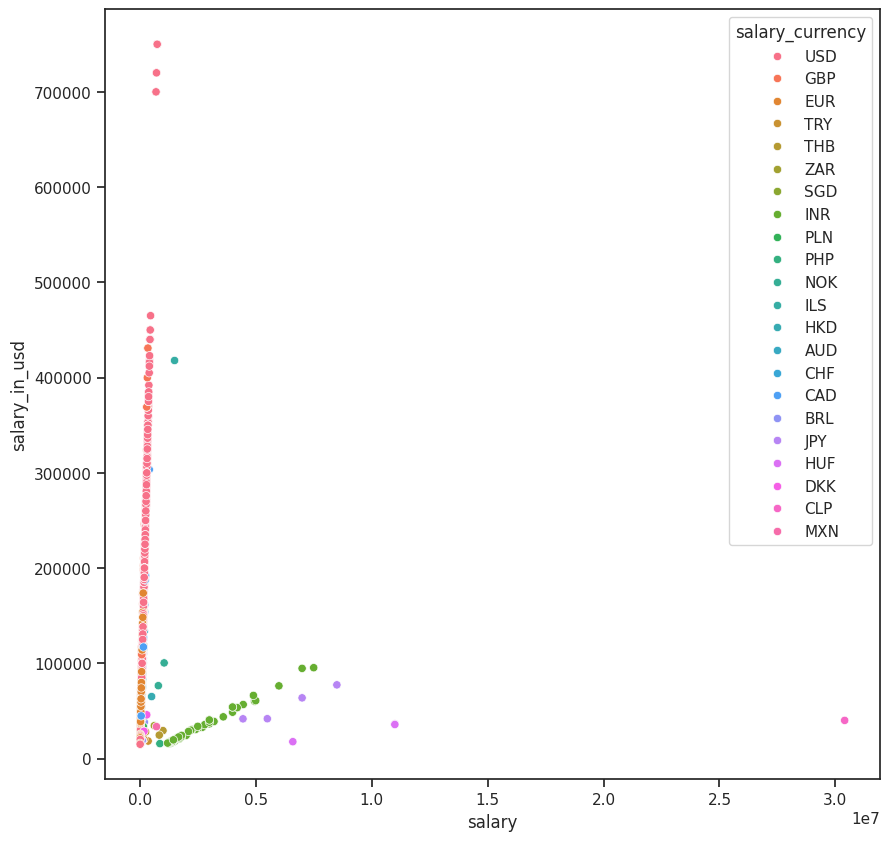

In [11]:
# диаграмма рассеяния цветная
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='salary', y='salary_in_usd', data=data, hue='salary_currency')

Действительно, именно валюта задаёт коээфициент зависимости.

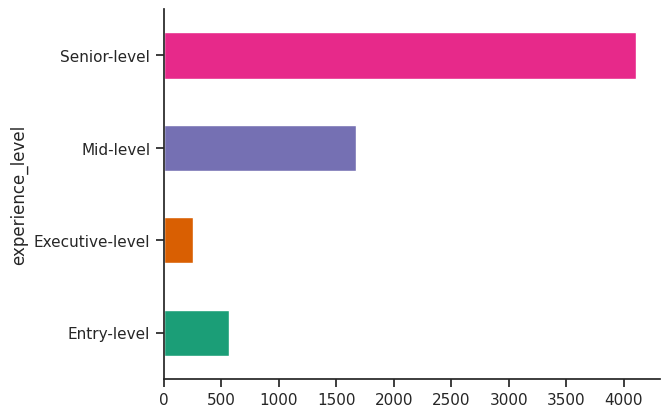

In [10]:
# гистограмма количества работников каждого уровня
data.groupby('experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'salary_in_usd')

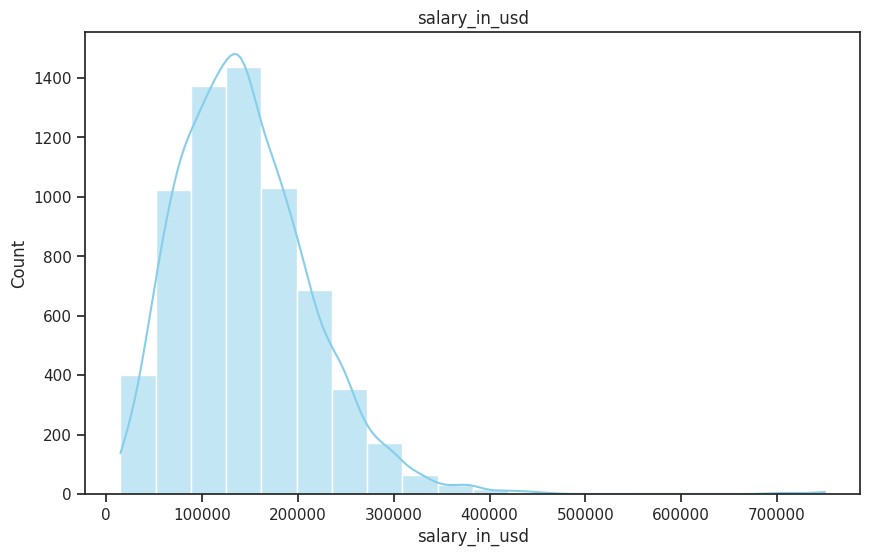

In [17]:
# гистограмма количества работников по зарплате
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=20, kde=True, color='skyblue')
plt.title('salary_in_usd')

<ipython-input-19-9c2516f90189>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='work_year', y='work_models', inner='box', palette='Dark2')


Text(0.5, 1.0, 'work_models vs work_year')

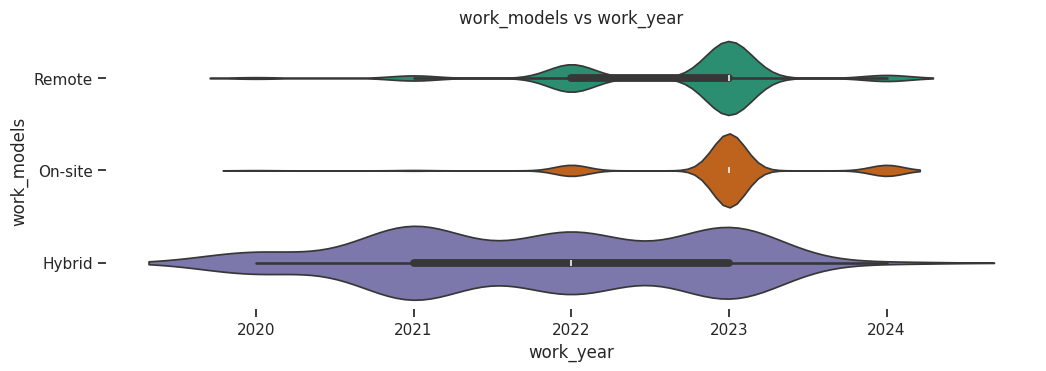

In [19]:
# сравнение количества каждого из типов работы по годам
figsize = (12, 1.2 * len(data['work_models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='work_year', y='work_models', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('work_models vs work_year')

<ipython-input-21-0267d9fe768e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='work_year', y='experience_level', inner='box', palette='Dark2')


Text(0.5, 1.0, 'experience_level vs work_year')

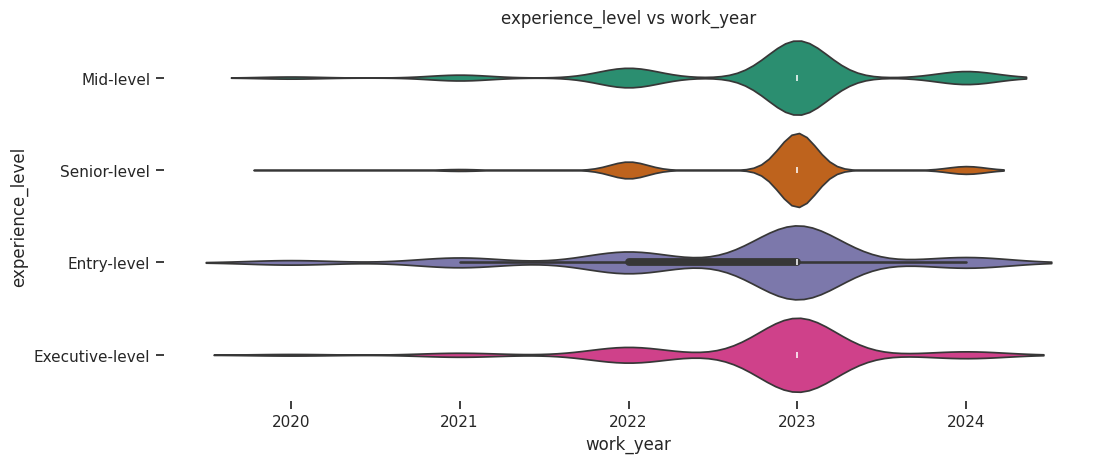

In [21]:
# сравнение количества работников каждой категории стажа по годам
figsize = (12, 1.2 * len(data['experience_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='work_year', y='experience_level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('experience_level vs work_year')

# **4) Информация о корреляции признаков**

In [34]:
# матрица корреляции
data.corr(method='spearman')

<ipython-input-34-cc0d2a5e93f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,work_year,salary,salary_in_usd
work_year,1.000000,0.094829,0.137257
salary,0.094829,1.000000,0.933650
salary_in_usd,0.137257,0.933650,1.000000


*   Целевой признак salary_in_usd сильно коррелирует (0.93) с salary
*   Целевой признак salary_in_usd слабо коррелирует (0.13) с work_year, можно сделать вывод, что в 2021-2024 годах не прослеживается тенденции в уровне зарплат
*   salary и work_year также практически не коррелируют

<ipython-input-36-628c3e0355e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), cmap='YlGnBu', annot=True, fmt='.3f')


<Axes: >

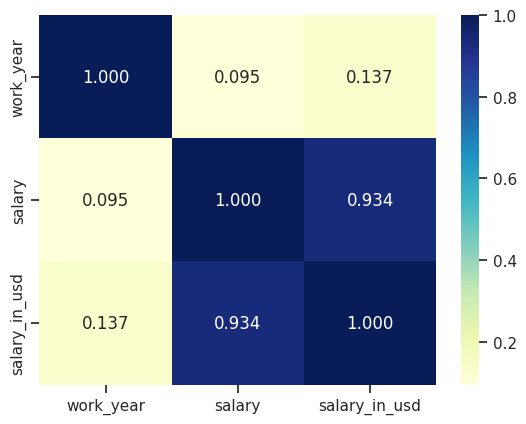

In [36]:
# тепловая карта
sns.heatmap(data.corr(method='spearman'), cmap='YlGnBu', annot=True, fmt='.3f')

<ipython-input-35-dfc1eb785718>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), cmap='YlGnBu', ax=ax[0], annot=True, fmt='.2f')
<ipython-input-35-dfc1eb785718>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='kendall'), cmap='YlGnBu', ax=ax[1], annot=True, fmt='.2f')
<ipython-input-35-dfc1eb785718>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), cmap='YlGnBu', ax=

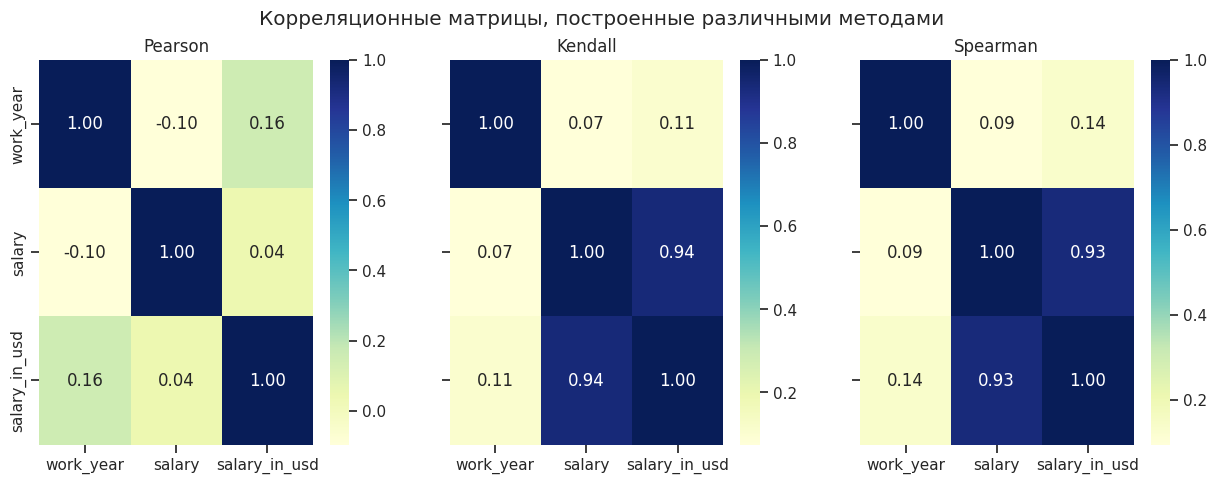

In [35]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), cmap='YlGnBu', ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), cmap='YlGnBu', ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), cmap='YlGnBu', ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')